# 梯度下降演示

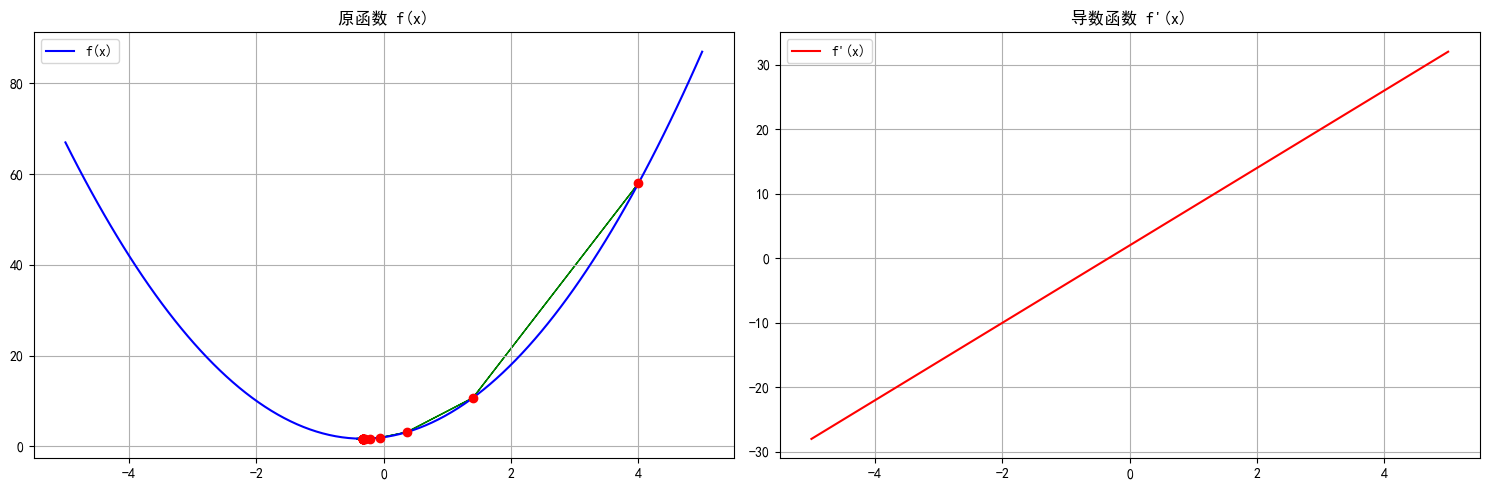

In [2]:
import numpy as np
from matplotlib import font_manager
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建一个简单的一元二次函数 f(x) = 3x^2 + 2x + 2
def f(x):
    return 3 * x**2 + 2 * x + 2
# 定义导数函数
def df(x):
    return 6 * x + 2
# 生成x轴数据点
x = np.linspace(-5, 5, 100)
y = f(x)
dy = df(x)

# 创建图形和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 绘制原函数
ax1.plot(x, y, 'b-', label='f(x)')
ax1.set_title('原函数 f(x)')
ax1.grid(True)
ax1.legend()

# 绘制导数函数
ax2.plot(x, dy, 'r-', label='f\'(x)')
ax2.set_title('导数函数 f\'(x)')
ax2.grid(True)
ax2.legend()

# 设置初始点和学习率
x_current = 4
learning_rate = 0.1
iterations = 20

# 进行梯度下降并在图上标记
for i in range(iterations):
    # 在原函数图上标记当前点
    ax1.plot(x_current, f(x_current), 'ro')
    
    # 计算下一个点
    gradient = df(x_current)
    x_next = x_current - learning_rate * gradient
    
    # 绘制移动方向
    ax1.arrow(x_current, f(x_current), 
              x_next - x_current, 
              f(x_next) - f(x_current),
              head_width=0.1, head_length=0.1, 
              fc='g', ec='g')
    
    x_current = x_next

plt.tight_layout()
plt.show()


# 梯度下降实战

特征矩阵中的缺失值数量：
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

目标变量中的缺失值数量：
0

数据完整性总结:
- 数据集总样本数: 20640
- 特征数量: 8
- 特征矩阵X中没有缺失值
- 目标变量y中没有缺失值
- 数据集完整性良好，可以进行后续建模
训练集大小: (16512, 8)
测试集大小: (4128, 8)

模型评估结果:
均方误差 (MSE): 0.5506
决定系数 (R²): 0.5798


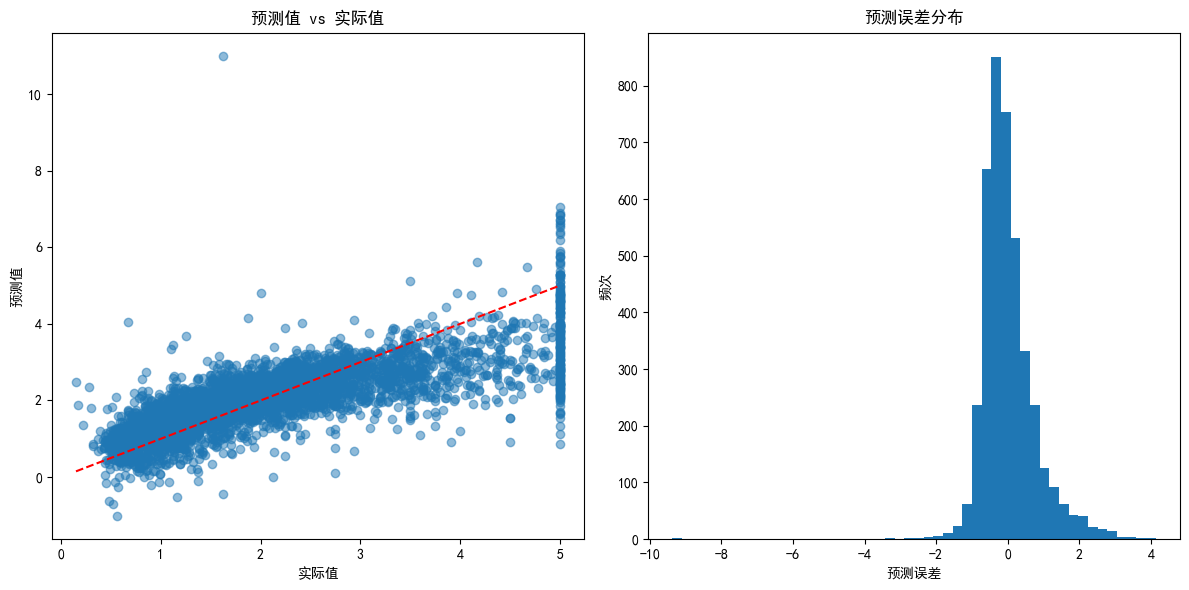

模型已保存为 'sgd_housing_model.pkl'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target
# 检查特征矩阵X是否有缺失值
print("特征矩阵中的缺失值数量：")
print(pd.DataFrame(X).isnull().sum())

# 检查目标变量y是否有缺失值
print("\n目标变量中的缺失值数量：")
print(pd.Series(y).isnull().sum())
# 数据完整性检查总结
print("\n数据完整性总结:")
print(f"- 数据集总样本数: {X.shape[0]}")
print(f"- 特征数量: {X.shape[1]}")
print("- 特征矩阵X中没有缺失值")
print("- 目标变量y中没有缺失值")
print("- 数据集完整性良好，可以进行后续建模")
# 划分训练集和测试集,测试集占20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印数据集划分结果
print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)
# 对特征进行标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 创建SGD回归模型
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

# 训练模型
sgd_reg.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = sgd_reg.predict(X_test_scaled)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n模型评估结果:")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('预测值 vs 实际值')

plt.subplot(1, 2, 2)
plt.hist(y_test - y_pred, bins=50)
plt.xlabel('预测误差')
plt.ylabel('频次')
plt.title('预测误差分布')

plt.tight_layout()
plt.show()

# 保存模型
joblib.dump(sgd_reg, 'sgd_housing_model.pkl')
print("模型已保存为 'sgd_housing_model.pkl'")



# 实战Lasso回归，岭回归


=== Lasso回归 ===
最佳alpha值: 0.001

Lasso模型评估结果:
均方误差 (MSE): 0.5545
决定系数 (R²): 0.5769


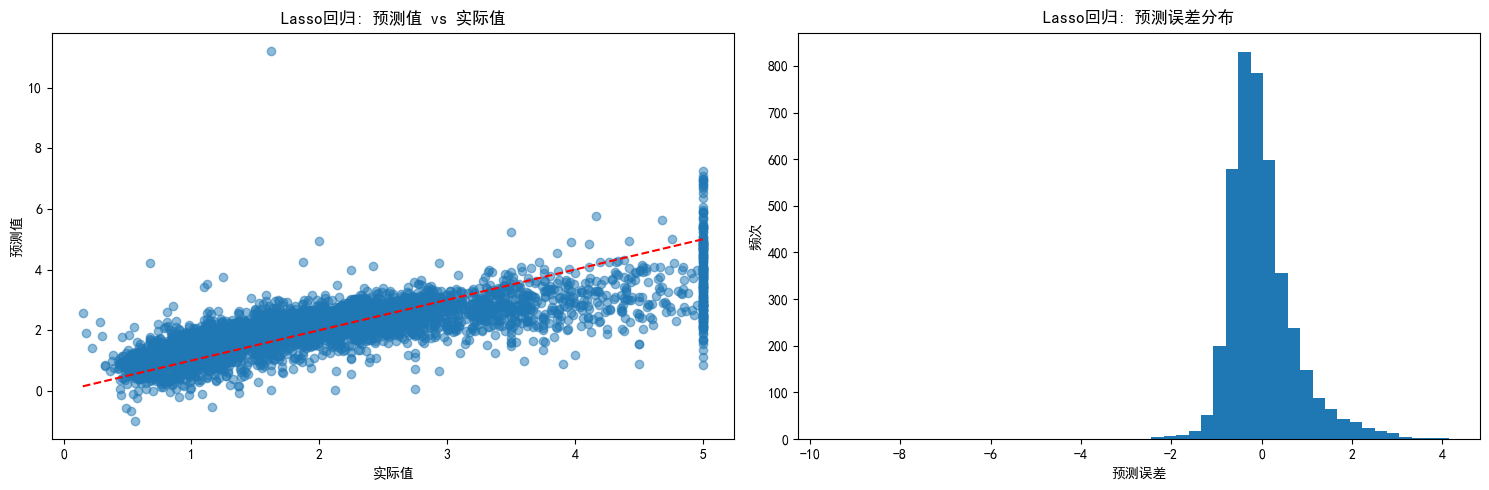


=== 岭回归 ===
最佳alpha值: 0.1

岭回归模型评估结果:
均方误差 (MSE): 0.5559
决定系数 (R²): 0.5758


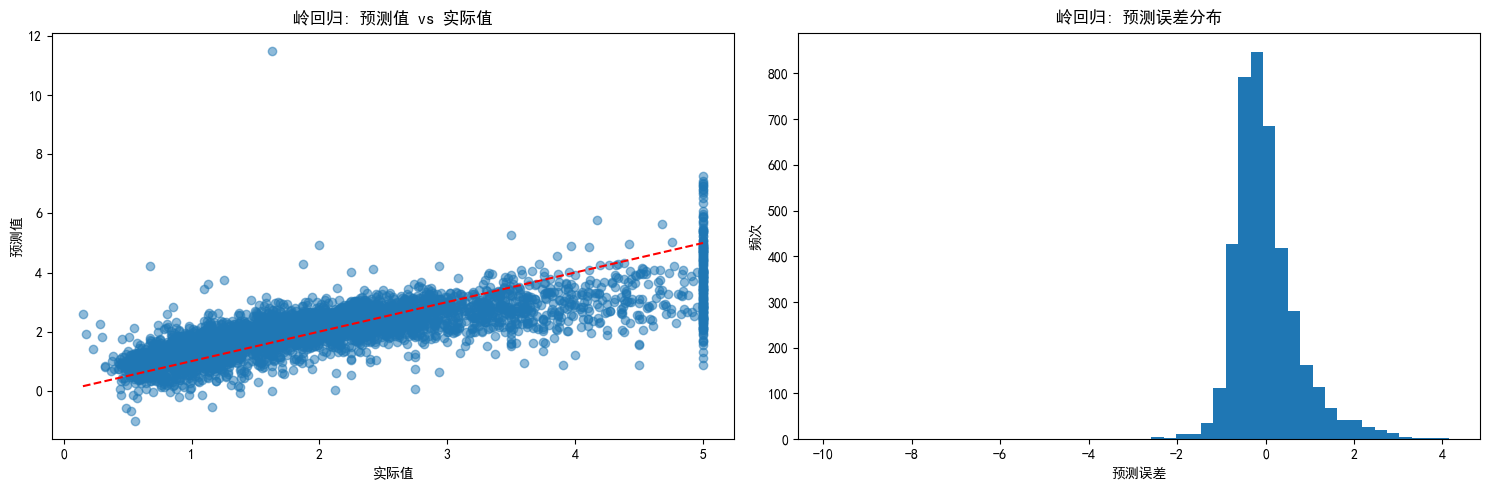


=== 模型性能比较 ===
SGD回归 - MSE: 0.5506, R²: 0.5798
Lasso回归 - MSE: 0.5545, R²: 0.5769
岭回归 - MSE: 0.5559, R²: 0.5758

最佳模型是: SGD回归, R²: 0.5798


In [4]:
# 导入必要的库
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

print("\n=== Lasso回归 ===")

# 创建Lasso回归模型
lasso_reg = Lasso(random_state=42)

# 使用网格搜索找到最佳alpha值
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_scaled, y_train)

# 获取最佳模型
best_lasso = lasso_grid_search.best_estimator_
best_alpha = lasso_grid_search.best_params_['alpha']
print(f"最佳alpha值: {best_alpha}")

# 在测试集上进行预测
y_pred_lasso = best_lasso.predict(X_test_scaled)

# 评估模型性能
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso模型评估结果:")
print(f"均方误差 (MSE): {mse_lasso:.4f}")
print(f"决定系数 (R²): {r2_lasso:.4f}")

# 可视化预测结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('Lasso回归: 预测值 vs 实际值')

plt.subplot(1, 2, 2)
plt.hist(y_test - y_pred_lasso, bins=50)
plt.xlabel('预测误差')
plt.ylabel('频次')
plt.title('Lasso回归: 预测误差分布')

plt.tight_layout()
plt.show()

print("\n=== 岭回归 ===")

# 创建岭回归模型
ridge_reg = Ridge(random_state=42)

# 使用网格搜索找到最佳alpha值
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y_train)

# 获取最佳模型
best_ridge = ridge_grid_search.best_estimator_
best_alpha = ridge_grid_search.best_params_['alpha']
print(f"最佳alpha值: {best_alpha}")

# 在测试集上进行预测
y_pred_ridge = best_ridge.predict(X_test_scaled)

# 评估模型性能
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n岭回归模型评估结果:")
print(f"均方误差 (MSE): {mse_ridge:.4f}")
print(f"决定系数 (R²): {r2_ridge:.4f}")

# 可视化预测结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('岭回归: 预测值 vs 实际值')

plt.subplot(1, 2, 2)
plt.hist(y_test - y_pred_ridge, bins=50)
plt.xlabel('预测误差')
plt.ylabel('频次')
plt.title('岭回归: 预测误差分布')

plt.tight_layout()
plt.show()

# 比较三种模型的性能
print("\n=== 模型性能比较 ===")
print(f"SGD回归 - MSE: {mse:.4f}, R²: {r2:.4f}")
print(f"Lasso回归 - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")
print(f"岭回归 - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

# 保存最佳模型
best_model_name = None
best_r2 = max(r2, r2_lasso, r2_ridge)

if best_r2 == r2:
    best_model_name = "SGD回归"
elif best_r2 == r2_lasso:
    best_model_name = "Lasso回归"
    joblib.dump(best_lasso, 'lasso_housing_model.pkl')
    print("Lasso模型已保存为 'lasso_housing_model.pkl'")
else:
    best_model_name = "岭回归"
    joblib.dump(best_ridge, 'ridge_housing_model.pkl')
    print("岭回归模型已保存为 'ridge_housing_model.pkl'")

print(f"\n最佳模型是: {best_model_name}, R²: {best_r2:.4f}")
